In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Load and preprocess the dataset
dataset = pd.read_csv("datasets/general.csv")
X = dataset.drop('Disease', axis=1)
y = dataset['Disease']

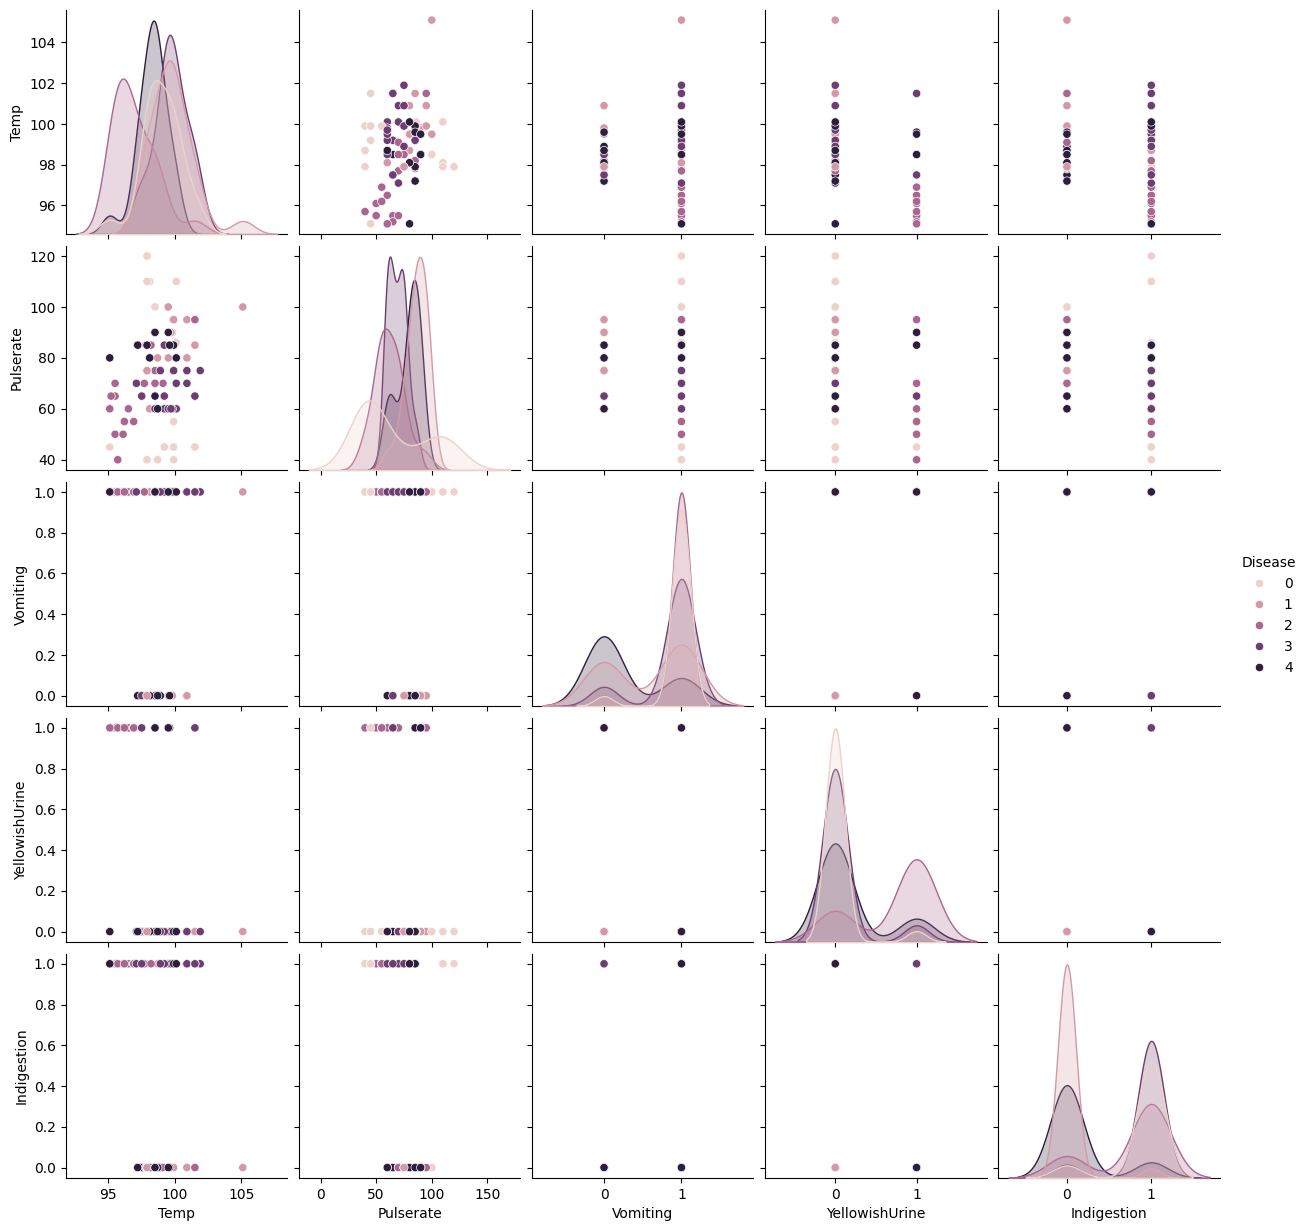

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(dataset, hue='Disease')
plt.show()

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [19]:
# Function to get user input and predict the disease
def predict_disease():
    print("Enter the following information:")
    temp_f = float(input("Temperature (F): "))
    pulse_rate_bpm = float(input("Pulse rate (bpm): "))
    vomiting = int(input("Vomiting (0 or 1): "))
    yellowish_urine = int(input("Yellowish Urine (0 or 1): "))
    indigestion = int(input("Indigestion (0 or 1): "))

    # Prepare user input as a single-row DataFrame
    user_input = pd.DataFrame({
        'Temp': [temp_f],
        'Pulserate': [pulse_rate_bpm],
        'Vomiting': [vomiting],
        'YellowishUrine': [yellowish_urine],
        'Indigestion': [indigestion]
    })

    # Standardize the user input
    user_input = scaler.transform(user_input)

    # Make prediction
    predicted_disease = model.predict(user_input)[0]
    print(f"Predicted Disease: {predicted_disease}")

# Call the predict_disease function to allow the user to input attributes and get predictions
predict_disease()


Enter the following information:
Predicted Disease: 2


In [20]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y, y_pred))


Accuracy: 0.954954954954955
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.85      0.96      0.90        24
           2       0.96      1.00      0.98        22
           3       1.00      0.96      0.98        23
           4       1.00      0.90      0.95        21

    accuracy                           0.95       111
   macro avg       0.96      0.95      0.96       111
weighted avg       0.96      0.95      0.96       111

Confusion Matrix:
[[20  1  0  0  0]
 [ 0 23  1  0  0]
 [ 0  0 22  0  0]
 [ 0  1  0 22  0]
 [ 0  2  0  0 19]]
